# Business Problem 
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

**Importing necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("LoanData.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data Understanding
- **Loan_ID** -	Unique Loan ID
- **Gender** -	Male/ Female
- **Married** -	Applicant married (Y/N)
- **Dependents** -	Number of dependents
- **Education** -	Applicant Education (Graduate/ Under Graduate)
- **Self_Employed** -	Self-employed (Y/N)
- **ApplicantIncome** -	Applicant income
- **CoapplicantIncome** -	Coapplicant income
- **LoanAmount** -	Loan amount in thousands
- **Loan_Amount_Term** -	Term of a loan in months
- **Credit_History** -	credit history meets guidelines
- **Property_Area** -	Urban/ Semi-Urban/ Rural
- **Loan_Status** -	Loan approved (Y/N)

# DataSet Understanding

In [4]:
df.drop(columns=['Loan_ID'],inplace=True)

In [5]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [6]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [7]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [8]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [9]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [10]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [12]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [13]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [14]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [15]:
df['ApplicantIncome'].duplicated().sum()
# 109 Having Same Applicant Income

109

In [16]:
df['ApplicantIncome'].nunique()
# 505 having different Applicant Income

505

In [17]:
df['CoapplicantIncome'].nunique()

287

In [18]:
df['CoapplicantIncome'].duplicated().sum()

327

In [19]:
df['LoanAmount'].nunique()

203

In [20]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [21]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [22]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [23]:
df['Credit_History'].replace({0:'bad',1:'good'},inplace=True)

# Exploratory Data Analysis(EDA)

In [24]:
Continous = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
discrete_categorical = ['Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
discrete_count = ['Dependents','Loan_Amount_Term']

## For Continuous Variable

In [25]:
df[Continous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


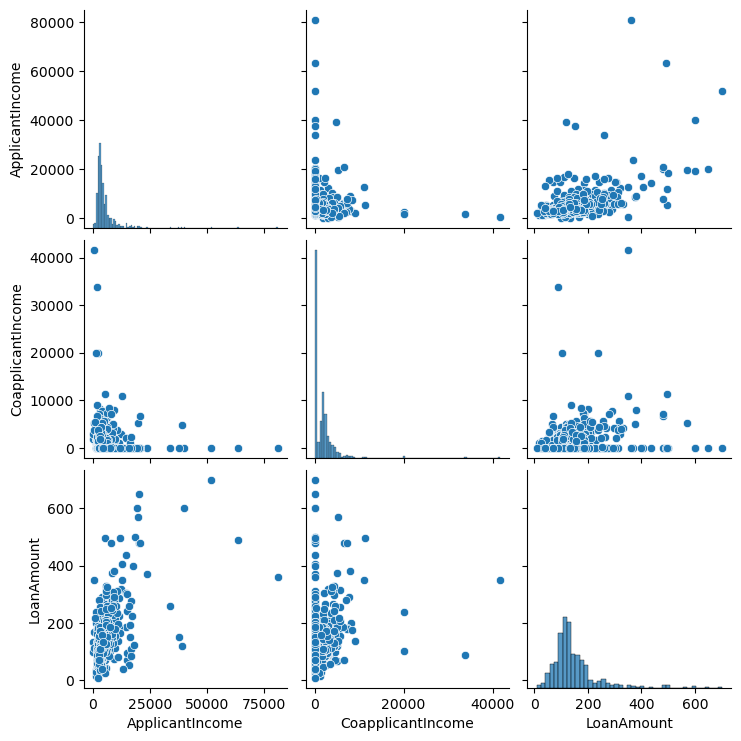

In [26]:
sns.pairplot(df[Continous])
plt.show()

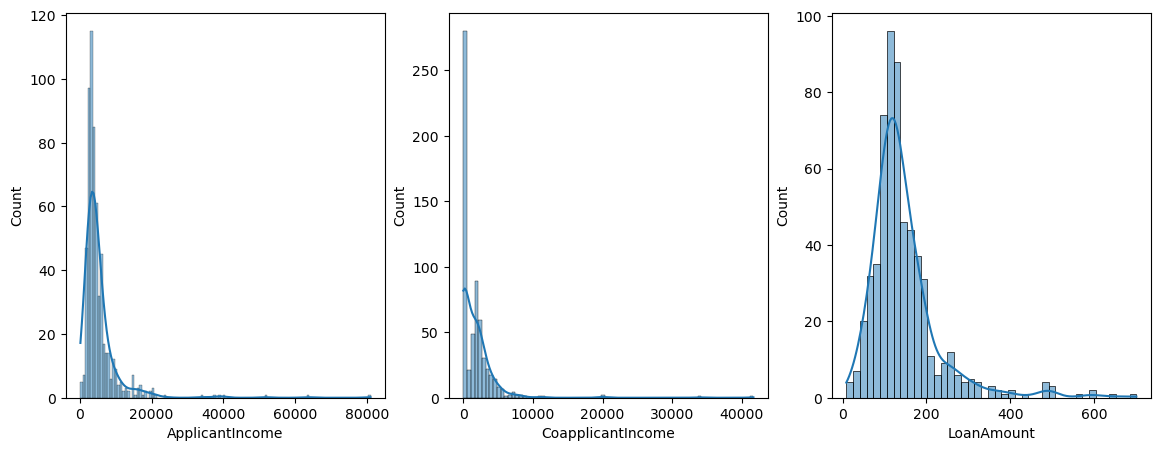

In [27]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.histplot(df['ApplicantIncome'],kde=True)

plt.subplot(1,3,2)
sns.histplot(df['CoapplicantIncome'],kde=True)

plt.subplot(1,3,3)
sns.histplot(df['LoanAmount'],kde=True)
plt.show()

In [28]:
df[Continous].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

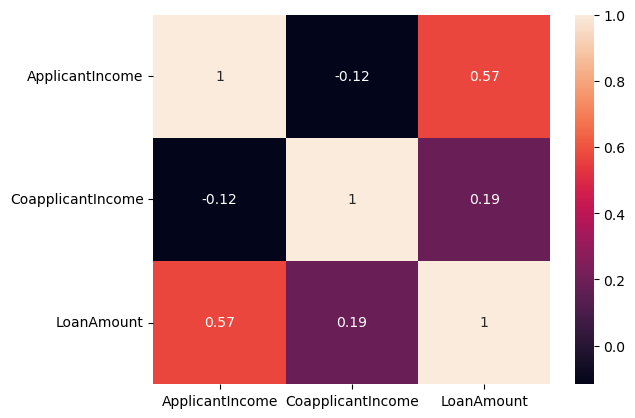

In [29]:
sns.heatmap(df[Continous].corr(),annot=True)
plt.show()

### Visuals of Outliers

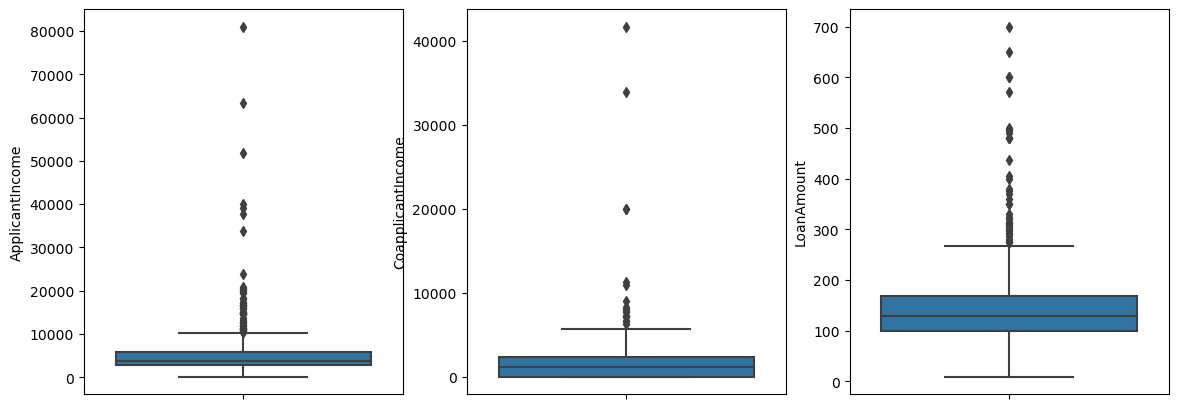

In [30]:
plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
sns.boxplot(y=df['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(y=df['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(y=df['LoanAmount'])

plt.show()

### For Discrete Variable

In [31]:
df[discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


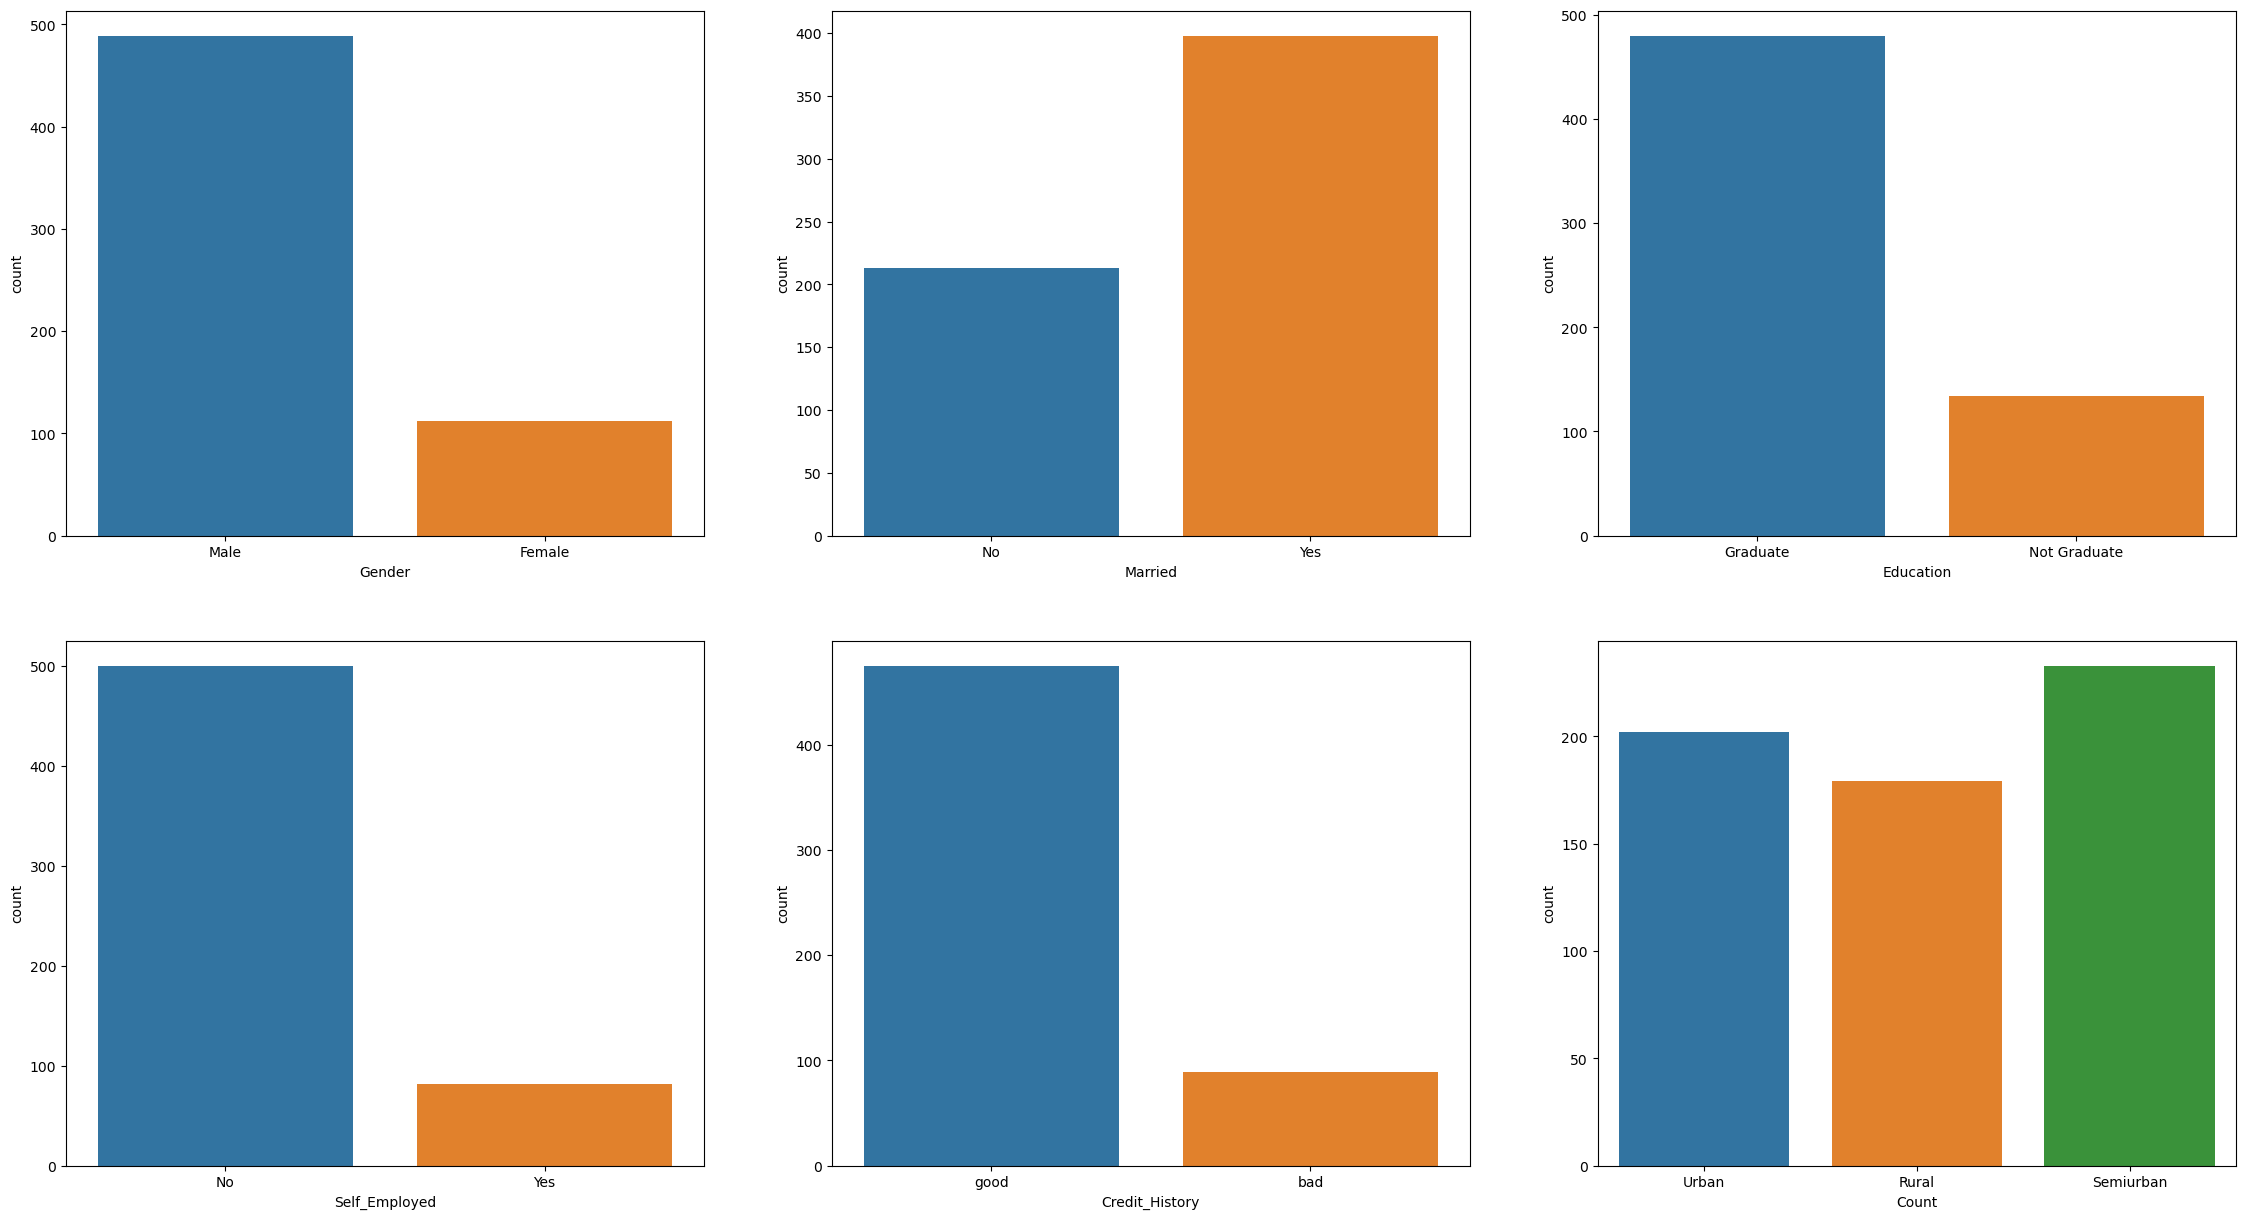

In [32]:
plt.figure(figsize=(28,15),edgecolor='red',)

plt.subplot(2,3,1)
sns.countplot(df['Gender'])

plt.subplot(2,3,2)
sns.countplot(df['Married'])

plt.subplot(2,3,3)
sns.countplot(df['Education'])

plt.subplot(2,3,4)
sns.countplot(df['Self_Employed'])

plt.subplot(2,3,5)
sns.countplot(df['Credit_History'])

plt.subplot(2,3,6)
sns.countplot(df['Property_Area'])

plt.xlabel("Count")
plt.show()

# Data Cleaning

**As the Eligibility Criteria is dependent on both ApplicantIncome and CoapplicantIncome so we will combine both of them.**

In [33]:
df['Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

**Modifing wrong Data**

In [34]:
df['Dependents'].replace({"3+":3},inplace=True)

Percentage wise null values

In [35]:
df.isnull().sum() / len(df)*100

Gender              2.117264
Married             0.488599
Dependents          2.442997
Education           0.000000
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
Property_Area       0.000000
Loan_Status         0.000000
Income              0.000000
dtype: float64

In [36]:
df.dropna(subset=['Income','LoanAmount','Loan_Amount_Term','Credit_History'],inplace=True)

**All the discrete variable are Replace with mode**

In [37]:
df['Dependents'].fillna(0,inplace=True)

In [38]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [39]:
df.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

# Encoding 

In [40]:
df['Gender'] = df['Gender'].map({'Male':1,"Female":0}).astype('int')
df['Married'] = df['Married'].map({"No":0,"Yes":1}).astype('int')
df['Education'] = df['Education'].map({"Graduate":0,"Not Graduate":1}).astype('int')
df['Self_Employed'] = df['Self_Employed'].map({"No":0,"Yes":1}).astype('int')
df['Credit_History'] = df['Credit_History'].map({"bad":0,"good":1}).astype('int')
df['Property_Area'] = df['Property_Area'].map({"Rural":0,"Semiurban":1,"Urban":2}).astype('int')
df['Loan_Status']= df['Loan_Status'].map({"N":0,"Y":1}).astype('int')

In [41]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('int')
df['Dependents'] = df['Dependents'].astype('int')

### Transform

In [42]:
df[['Income','LoanAmount']].skew()

Income        5.777628
LoanAmount    2.607945
dtype: float64

In [43]:
from scipy.stats import boxcox
df['Income'],a = boxcox(df['Income'])
df['LoanAmount'],b = boxcox(df['LoanAmount'])

In [44]:
df[['Income','LoanAmount']].skew()

Income       -0.027769
LoanAmount    0.038289
dtype: float64

*Loan Amount was in months so it was converted to year*

In [45]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term']/12

# Train Test Split

In [46]:
X = df.drop('Loan_Status',axis=1)

In [47]:
y= df['Loan_Status']

### Find Best Random State Number

In [48]:
train = []
test = []
cv=[]
for i in range(1,150):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)
    lr_model = LogisticRegression()
    lr_model.fit(X_train,y_train)
    train_pred = lr_model.predict(X_train)
    test_pred = lr_model.predict(X_test)
    train.append(accuracy_score(y_train,train_pred))
    test.append(accuracy_score(y_test,test_pred))
    cv.append(cross_val_score(lr_model,X_train,y_train,cv=5).mean())
em = pd.DataFrame({"Train":train,"test":test,"CV":cv})
gm = em[(abs(em['Train']-em['test'])<=0.05) & abs(em['test']-em['CV']<=0.05)]
rs = gm[gm['test']==gm['test'].max()].index.tolist()[0]
print("Best Random State : ",rs)

Best Random State :  15


# Modeling

# Logistic Regression

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=rs)

# Modeling

lr_final = LogisticRegression()
lr_final.fit(X_train,y_train)

# Prediction
y_l_train = lr_final.predict(X_train) 
y_l_test = lr_final.predict(X_test)

# Evaluation

print("Train Accuracy Score : ",accuracy_score(y_train,y_l_train))
print("Test Accuracy Score :",accuracy_score(y_test,y_l_test))
print("Cross Validation Score :",cross_val_score(lr_final,X_train,y_train,cv=5,scoring='accuracy').mean())

Train Accuracy Score :  0.8132387706855791
Test Accuracy Score : 0.8207547169811321
Cross Validation Score : 0.8132492997198879


# KNN Algorithm

In [50]:
# Modeling

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
#Prediction

knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

# Evaluation
print("Train Accuracy : ",accuracy_score(y_train,knn_train_pred))
print("Test Accuracy :",accuracy_score(y_test,knn_test_pred))
print("Cross Validation : ",cross_val_score(knn,X_train,y_train,cv=5).mean())

Train Accuracy :  0.8156028368794326
Test Accuracy : 0.7075471698113207
Cross Validation :  0.7446218487394958


### Hyperparameter Tuning

In [51]:
from sklearn.model_selection import GridSearchCV
estimator = KNeighborsClassifier()

param_grid = {'n_neighbors':list(range(1,30))}

knn_grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
knn_grid.fit(X_train,y_train)
knn_grid.best_params_

{'n_neighbors': 7}

# Using Best Hyperparameter Tuning

In [52]:
# Modeling
from sklearn.neighbors import KNeighborsClassifier
knn_final = KNeighborsClassifier(n_neighbors=7)
knn_final.fit(X_train,y_train)
#Prediction

knn_final_train_pred = knn_final.predict(X_train)
knn_final_test_pred = knn_final.predict(X_test)

# Evaluation
print("Train Accuracy : ",accuracy_score(y_train,knn_final_train_pred))
print("Test Accuracy :",accuracy_score(y_test,knn_final_test_pred))
print("Cross Validation : ",cross_val_score(knn_final,X_train,y_train,cv=5,scoring='accuracy').mean())

Train Accuracy :  0.7990543735224587
Test Accuracy : 0.7169811320754716
Cross Validation :  0.768235294117647


# SVM(Support Vector Machine)

In [53]:
#Modelling
svm = SVC()
svm.fit(X_train,y_train)

#Prediction
svm_train_pred = svm.predict(X_train) 
svm_test_pred = svm.predict(X_test)

#Evaluation
print("RMSE : ",np.sqrt(mean_squared_error(y_test,svm_test_pred)))
print("Train Accuracy :",accuracy_score(y_train,svm_train_pred))
print("Test Accuracy :",accuracy_score(y_test,svm_test_pred))
print("Cross Validation Score :",cross_val_score(svm,X_train,y_train,cv=5).mean())

RMSE :  0.5746204653902287
Train Accuracy : 0.6973995271867612
Test Accuracy : 0.6698113207547169
Cross Validation Score : 0.6974229691876751


# HyperParameter Tuning

In [54]:
svm_estimator = SVC()
svm_param_grid = {'C':[0.1,0.01,0.001],"kernel":['linear','rbf','sigmoid','poly']}
svm_grid = GridSearchCV(svm_estimator,svm_param_grid,cv=5)
svm_grid.fit(X_train,y_train)
svm_grid.best_params_

{'C': 0.1, 'kernel': 'linear'}

# Applying Best HyperParameter Tuning

In [55]:
#Modelling
svm_final = SVC(C=0.1,kernel='linear')
svm_final.fit(X_train,y_train)

#Prediction
svm_train_pred = svm_final.predict(X_train) 
svm_test_pred = svm_final.predict(X_test)

#Evaluation
print("Train Accuracy :",accuracy_score(y_train,svm_train_pred))
print("Test Accuracy :",accuracy_score(y_test,svm_test_pred))
print("Cross Validation Score :",cross_val_score(svm_final,X_train,y_train,cv=5,scoring='accuracy').mean())

Train Accuracy : 0.8132387706855791
Test Accuracy : 0.8207547169811321
Cross Validation Score : 0.8132492997198879


# Decision Tree

In [56]:
# Modeling 

dt_default = DecisionTreeClassifier(random_state=rs)
dt_default.fit(X_train,y_train)

# Prediction

dt_pred_train = dt_default.predict(X_train)
dt_pred_test = dt_default.predict(X_test)

# Evaluation
print("RMSE :",np.sqrt(mean_squared_error(y_test,dt_pred_test)))
print("Train Accuracy : ",accuracy_score(y_train,dt_pred_train))
print("Test Accuracy :",accuracy_score(y_test,dt_pred_test))
print("Cross Validation Score : ",cross_val_score(dt_default,X_train,y_train,cv=5,scoring='accuracy').mean())

RMSE : 0.5230534443633627
Train Accuracy :  1.0
Test Accuracy : 0.7264150943396226
Cross Validation Score :  0.7375910364145659


**Ploting Of Decision Tree**

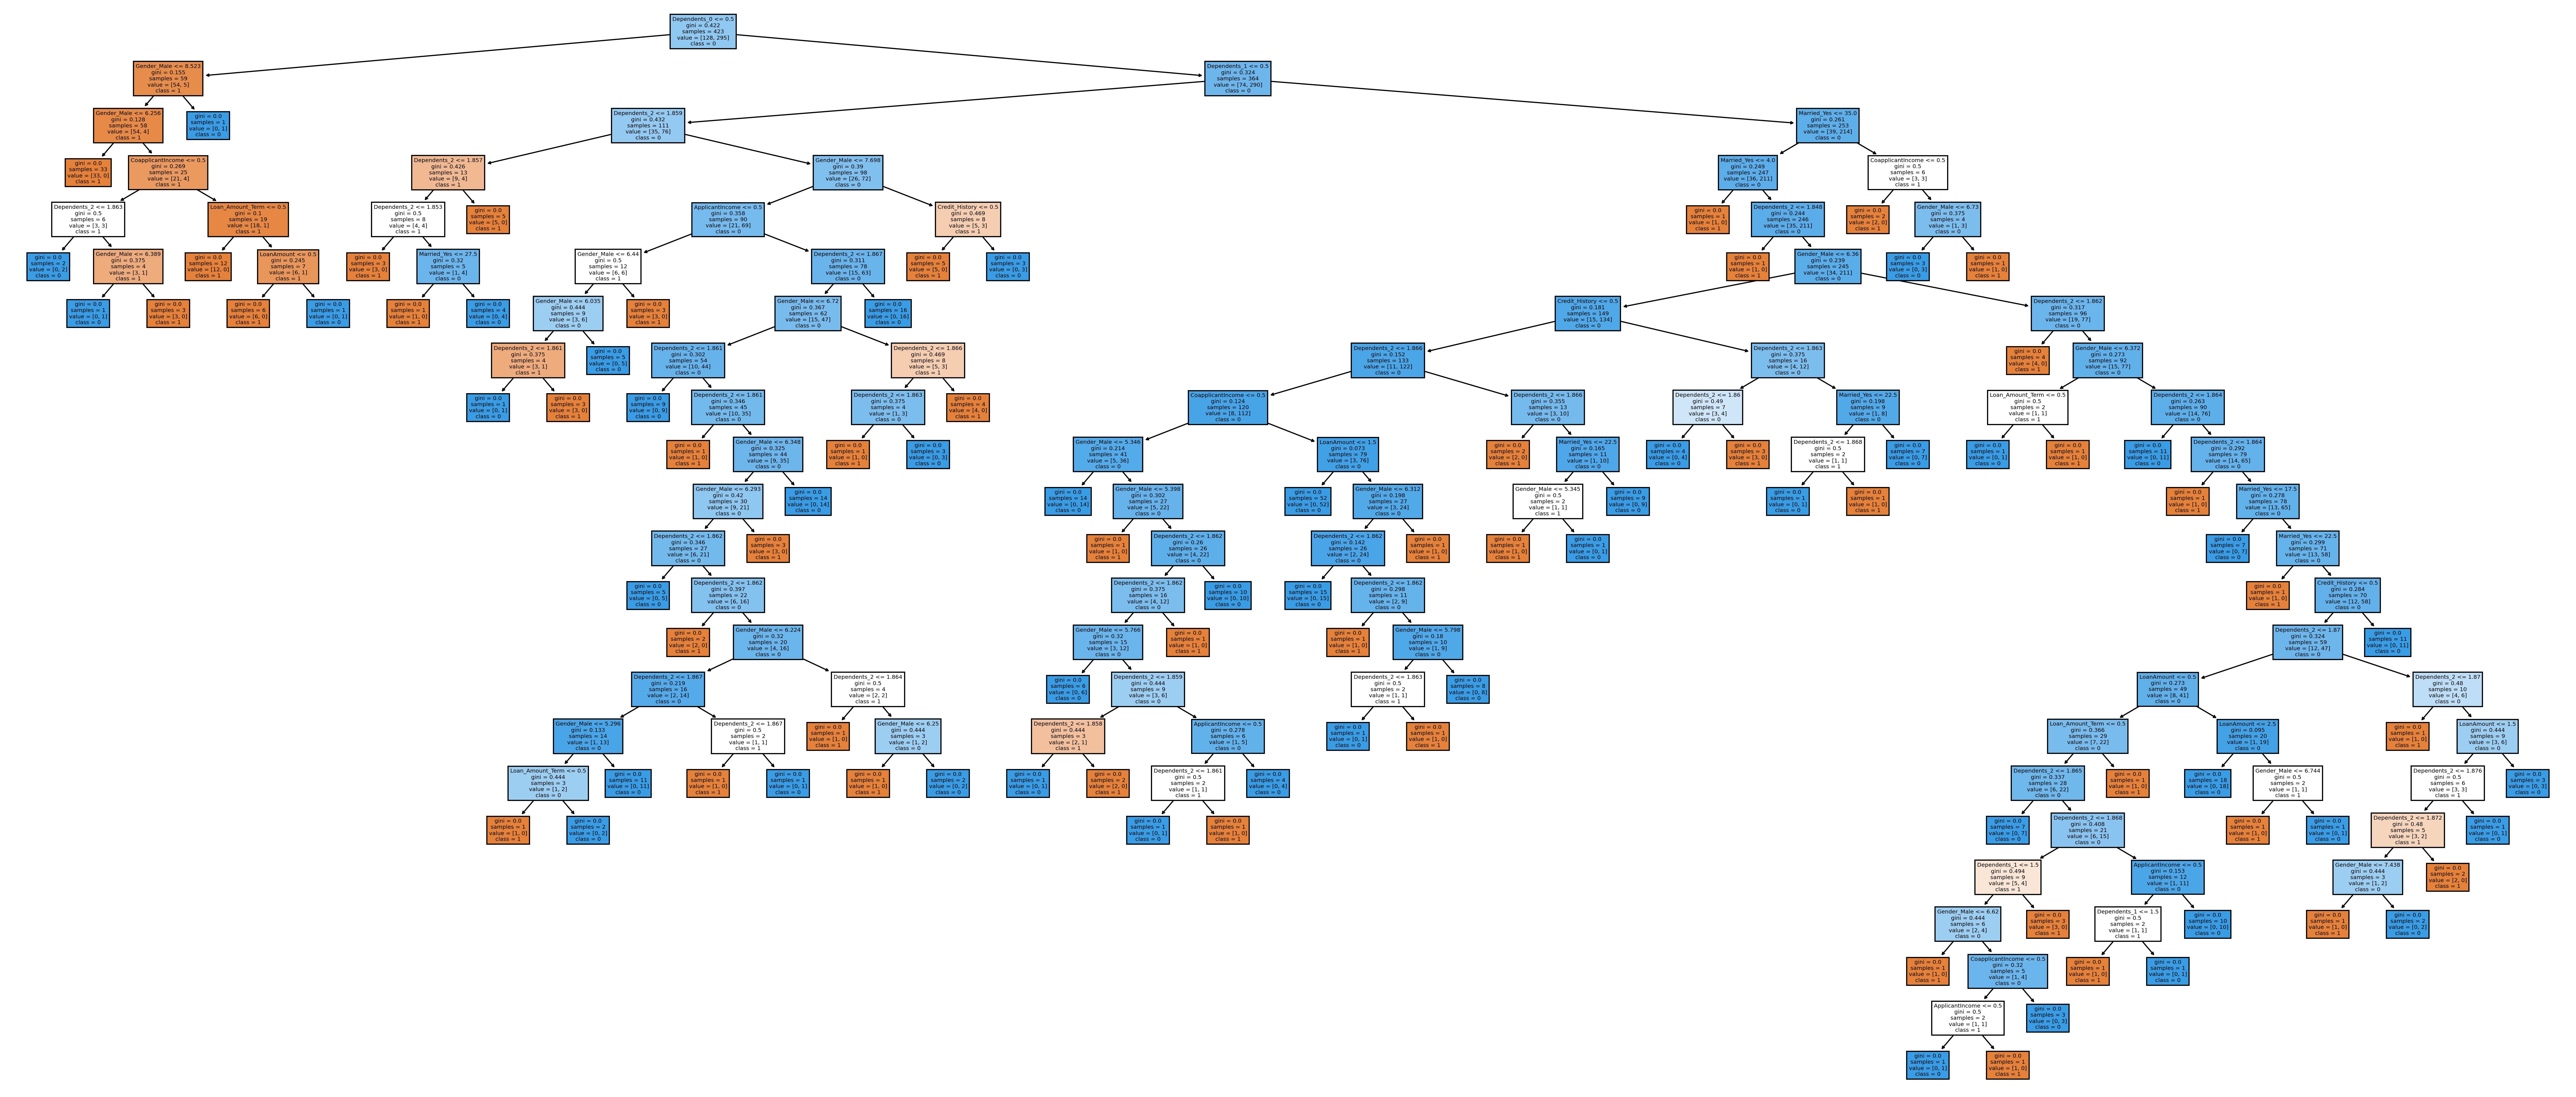

In [57]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,17),dpi=300)

plot_tree(dt_default,filled=True,feature_names=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],class_names=['1','0'])
plt.show()

# Hyperparameter Tuning

In [58]:
dt_estimator = DecisionTreeClassifier(random_state=rs)

dt_param_grid = {"criterion":['gini','entropy'],
                "max_depth":list(range(1,11))}
dt_grid = GridSearchCV(dt_estimator,dt_param_grid,cv=5,scoring='accuracy')
dt_grid.fit(X_train,y_train)
dt_grid.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [64]:
# Modeling 

dt = dt_grid.best_estimator_ # Modeling with best Parameters
imp_feat = dt.feature_importances_ # Extracting Important Features

index = [i for i,x in enumerate(imp_feat) if x>0]

# selecting the Features
X_train_dt = X_train.iloc[:,index]
X_test_dt = X_test.iloc[:,index]

dt.fit(X_train_dt,y_train)

# Prediction

dt_pred_train = dt.predict(X_train_dt)
dt_pred_test = dt.predict(X_test_dt)

# Evaluation
print("Train Accuracy : ",accuracy_score(y_train,dt_pred_train))
print("Test Accuracy :",accuracy_score(y_test,dt_pred_test))
print("Cross Validation Score : ",cross_val_score(dt,X_train_dt,y_train,cv=5,scoring='accuracy').mean())


Train Accuracy :  0.8132387706855791
Test Accuracy : 0.8207547169811321
Cross Validation Score :  0.8132492997198879


# Random Forest Classifier

In [60]:
rf_estimator = RandomForestClassifier(random_state=rs)

rf_param_grid = {"n_estimators":list(range(1,51))}
rf_grid = GridSearchCV(rf_estimator,rf_param_grid,cv=5,scoring='accuracy')
rf_grid.fit(X_train,y_train)
# Modeling 

random_forest = rf_grid.best_estimator_ # Modeling with best Parameters
imp_feat = random_forest.feature_importances_ # Extracting Important Features

index = [i for i,x in enumerate(imp_feat) if x>0]

# selecting the Features
X_train_rf = X_train.iloc[:,index]
X_test_rf = X_test.iloc[:,index]

random_forest.fit(X_train_rf,y_train)

# Prediction

rf_pred_train = random_forest.predict(X_train_rf)
rf_pred_test = random_forest.predict(X_test_rf)

# Evaluation

print("Train Accuracy : ",accuracy_score(y_train,rf_pred_train))
print("Test Accuracy :",accuracy_score(y_test,rf_pred_test))
print("Cross Validation Score : ",cross_val_score(random_forest,X_train_rf,y_train,cv=5,scoring='accuracy').mean())

Train Accuracy :  1.0
Test Accuracy : 0.839622641509434
Cross Validation Score :  0.7872268907563026


# AdaBoost Classifier

In [61]:
adb_estimator = AdaBoostClassifier(random_state=rs)

adb_param_grid = {"n_estimators":list(range(1,51))}
adb_grid = GridSearchCV(adb_estimator,adb_param_grid,cv=5,scoring='accuracy')
adb_grid.fit(X_train,y_train)
# Modeling 

adaboost = adb_grid.best_estimator_ # Modeling with best Parameters
imp_feat = adaboost.feature_importances_ # Extracting Important Features

index = [i for i,x in enumerate(imp_feat) if x>0]

# selecting the Features
X_train_adb = X_train.iloc[:,index]
X_test_adb = X_test.iloc[:,index]

adaboost.fit(X_train_adb,y_train)

# Prediction

adb_pred_train = adaboost.predict(X_train_adb)
adb_pred_test = adaboost.predict(X_test_adb)

# Evaluation

print("Train Accuracy : ",accuracy_score(y_train,adb_pred_train))
print("Test Accuracy :",accuracy_score(y_test,adb_pred_test))
print("Cross Validation Score : ",cross_val_score(adaboost,X_train_adb,y_train,cv=5,scoring='accuracy').mean())

Train Accuracy :  0.8392434988179669
Test Accuracy : 0.7924528301886793
Cross Validation Score :  0.8108683473389355


# Gradient Boost Classifier

In [62]:
gb_estimator = GradientBoostingClassifier(random_state=rs)

gb_param_grid = {"n_estimators":list(range(1,51)) , "learning_rate":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
gb_grid = GridSearchCV(gb_estimator,gb_param_grid,cv=5,scoring='accuracy')
gb_grid.fit(X_train,y_train)
# Modeling 

gboost = gb_grid.best_estimator_ # Modeling with best Parameters
imp_feat = gboost.feature_importances_ # Extracting Important Features

index = [i for i,x in enumerate(imp_feat) if x>0]

# selecting the Features
X_train_gb = X_train.iloc[:,index]
X_test_gb = X_test.iloc[:,index]

gboost.fit(X_train_gb,y_train)

# Prediction

gb_pred_train = gboost.predict(X_train_gb)
gb_pred_test = gboost.predict(X_test_gb)

# Evaluation

print("Train Accuracy : ",accuracy_score(y_train,gb_pred_train))
print("Test Accuracy :",accuracy_score(y_test,gb_pred_test))
print("Cross Validation Score : ",cross_val_score(gboost,X_train_gb,y_train,cv=5,scoring='accuracy').mean())

Train Accuracy :  0.8226950354609929
Test Accuracy : 0.8113207547169812
Cross Validation Score :  0.8132492997198879


# XGBoost Classifier

In [63]:
xgb_estimator = XGBClassifier(random_state=rs)

xgb_param_grid = {"n_estimators":[1,5,10,15,20] , "learning_rate":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],"gamma":[0.1,0.15,0.5,0.20]}
xgb_grid = GridSearchCV(xgb_estimator,xgb_param_grid,cv=5,scoring='accuracy')
xgb_grid.fit(X_train,y_train)
# Modeling 

xgboost = xgb_grid.best_estimator_ # Modeling with best Parameters
imp_feat = xgboost.feature_importances_ # Extracting Important Features

index = [i for i,x in enumerate(imp_feat) if x>0]

# selecting the Features
X_train_xgb = X_train.iloc[:,index]
X_test_xgb = X_test.iloc[:,index]

xgboost.fit(X_train_xgb,y_train)

# Prediction

xgb_pred_train = xgboost.predict(X_train_xgb)
xgb_pred_test = xgboost.predict(X_test_xgb)

# Evaluation

print("Train Accuracy : ",accuracy_score(y_train,xgb_pred_train))
print("Test Accuracy :",accuracy_score(y_test,xgb_pred_test))
print("Cross Validation Score : ",cross_val_score(xgboost,X_train_xgb,y_train,cv=5,scoring='accuracy').mean())

Train Accuracy :  0.8321513002364066
Test Accuracy : 0.8207547169811321
Cross Validation Score :  0.8132212885154061


# Train Accuracy, Test Accuracy and Cross Validation Score of all the Alogrithms

# Logistic Regression 
- Train Accuracy Score :  0.8132387706855791
- Test Accuracy Score : 0.8207547169811321
- Cross Validation Score : 0.8132492997198879

# KNN 
- Train Accuracy :  0.7990543735224587
- Test Accuracy : 0.7169811320754716
- Cross Validation :  0.768235294117647

# SVM
- Train Accuracy : 0.8132387706855791
- Test Accuracy : 0.8207547169811321
- Cross Validation Score : 0.8132492997198879

# Decision Tree Classifier
- Train Accuracy :  0.8132387706855791
- Test Accuracy : 0.8207547169811321
- Cross Validation Score :  0.8132492997198879

# Random Forest Classifier
- Train Accuracy :  1.0
- Test Accuracy : 0.839622641509434
- Cross Validation Score :  0.7872268907563026

# ADABoost Classifier
- Train Accuracy :  0.8392434988179669
- Test Accuracy : 0.7924528301886793
- Cross Validation Score :  0.8108683473389355

# Gradient Boost
- Train Accuracy :  0.8226950354609929
- Test Accuracy : 0.8113207547169812
- Cross Validation Score :  0.8132492997198879

# XGBoost Classifier
- Train Accuracy :  0.8321513002364066
- Test Accuracy : 0.8207547169811321
- Cross Validation Score :  0.8132212885154061

**Conclusion:**
- In this project, we addressed the business problem presented by Dream Housing Finance, which sought to automate the loan eligibility process based on customer details provided during the online application. The objective was to identify eligible customer segments for targeted marketing.

- We employed various machine learning algorithms, including Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Decision Tree Classifier, Random Forest Classifier, ADABoost Classifier, Gradient Boost, and XGBoost Classifier. Each algorithm was evaluated on three key metrics: Train Accuracy, Test Accuracy, and Cross-Validation Score.

**Summary of Results:**

- Logistic Regression, SVM, Decision Tree Classifier, and XGBoost Classifier demonstrated consistent performance with high accuracy on both training and test datasets.
Random Forest Classifier achieved perfect accuracy on the training set but slightly lower accuracy on the test set, indicating potential overfitting.
ADABoost and Gradient Boost also performed well, showing competitive accuracy on both training and test datasets.

**Feature Importance:**
- One notable observation is that the Decision Tree Classifier exhibited the best performance, potentially due to its feature importance being associated with a single feature. This characteristic can lead to faster execution, especially when dimensionality reduction techniques, such as embedded methods, are employed.